# Assignment 2

## Importing the libraries


In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 10
import seaborn as sb

from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

## Loading Dataset

In [2]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer ()
df = pd.DataFrame (data=data.data, columns=data.feature_names)

### D1 [2 Marks]

<Figure size 2500x2500 with 0 Axes>

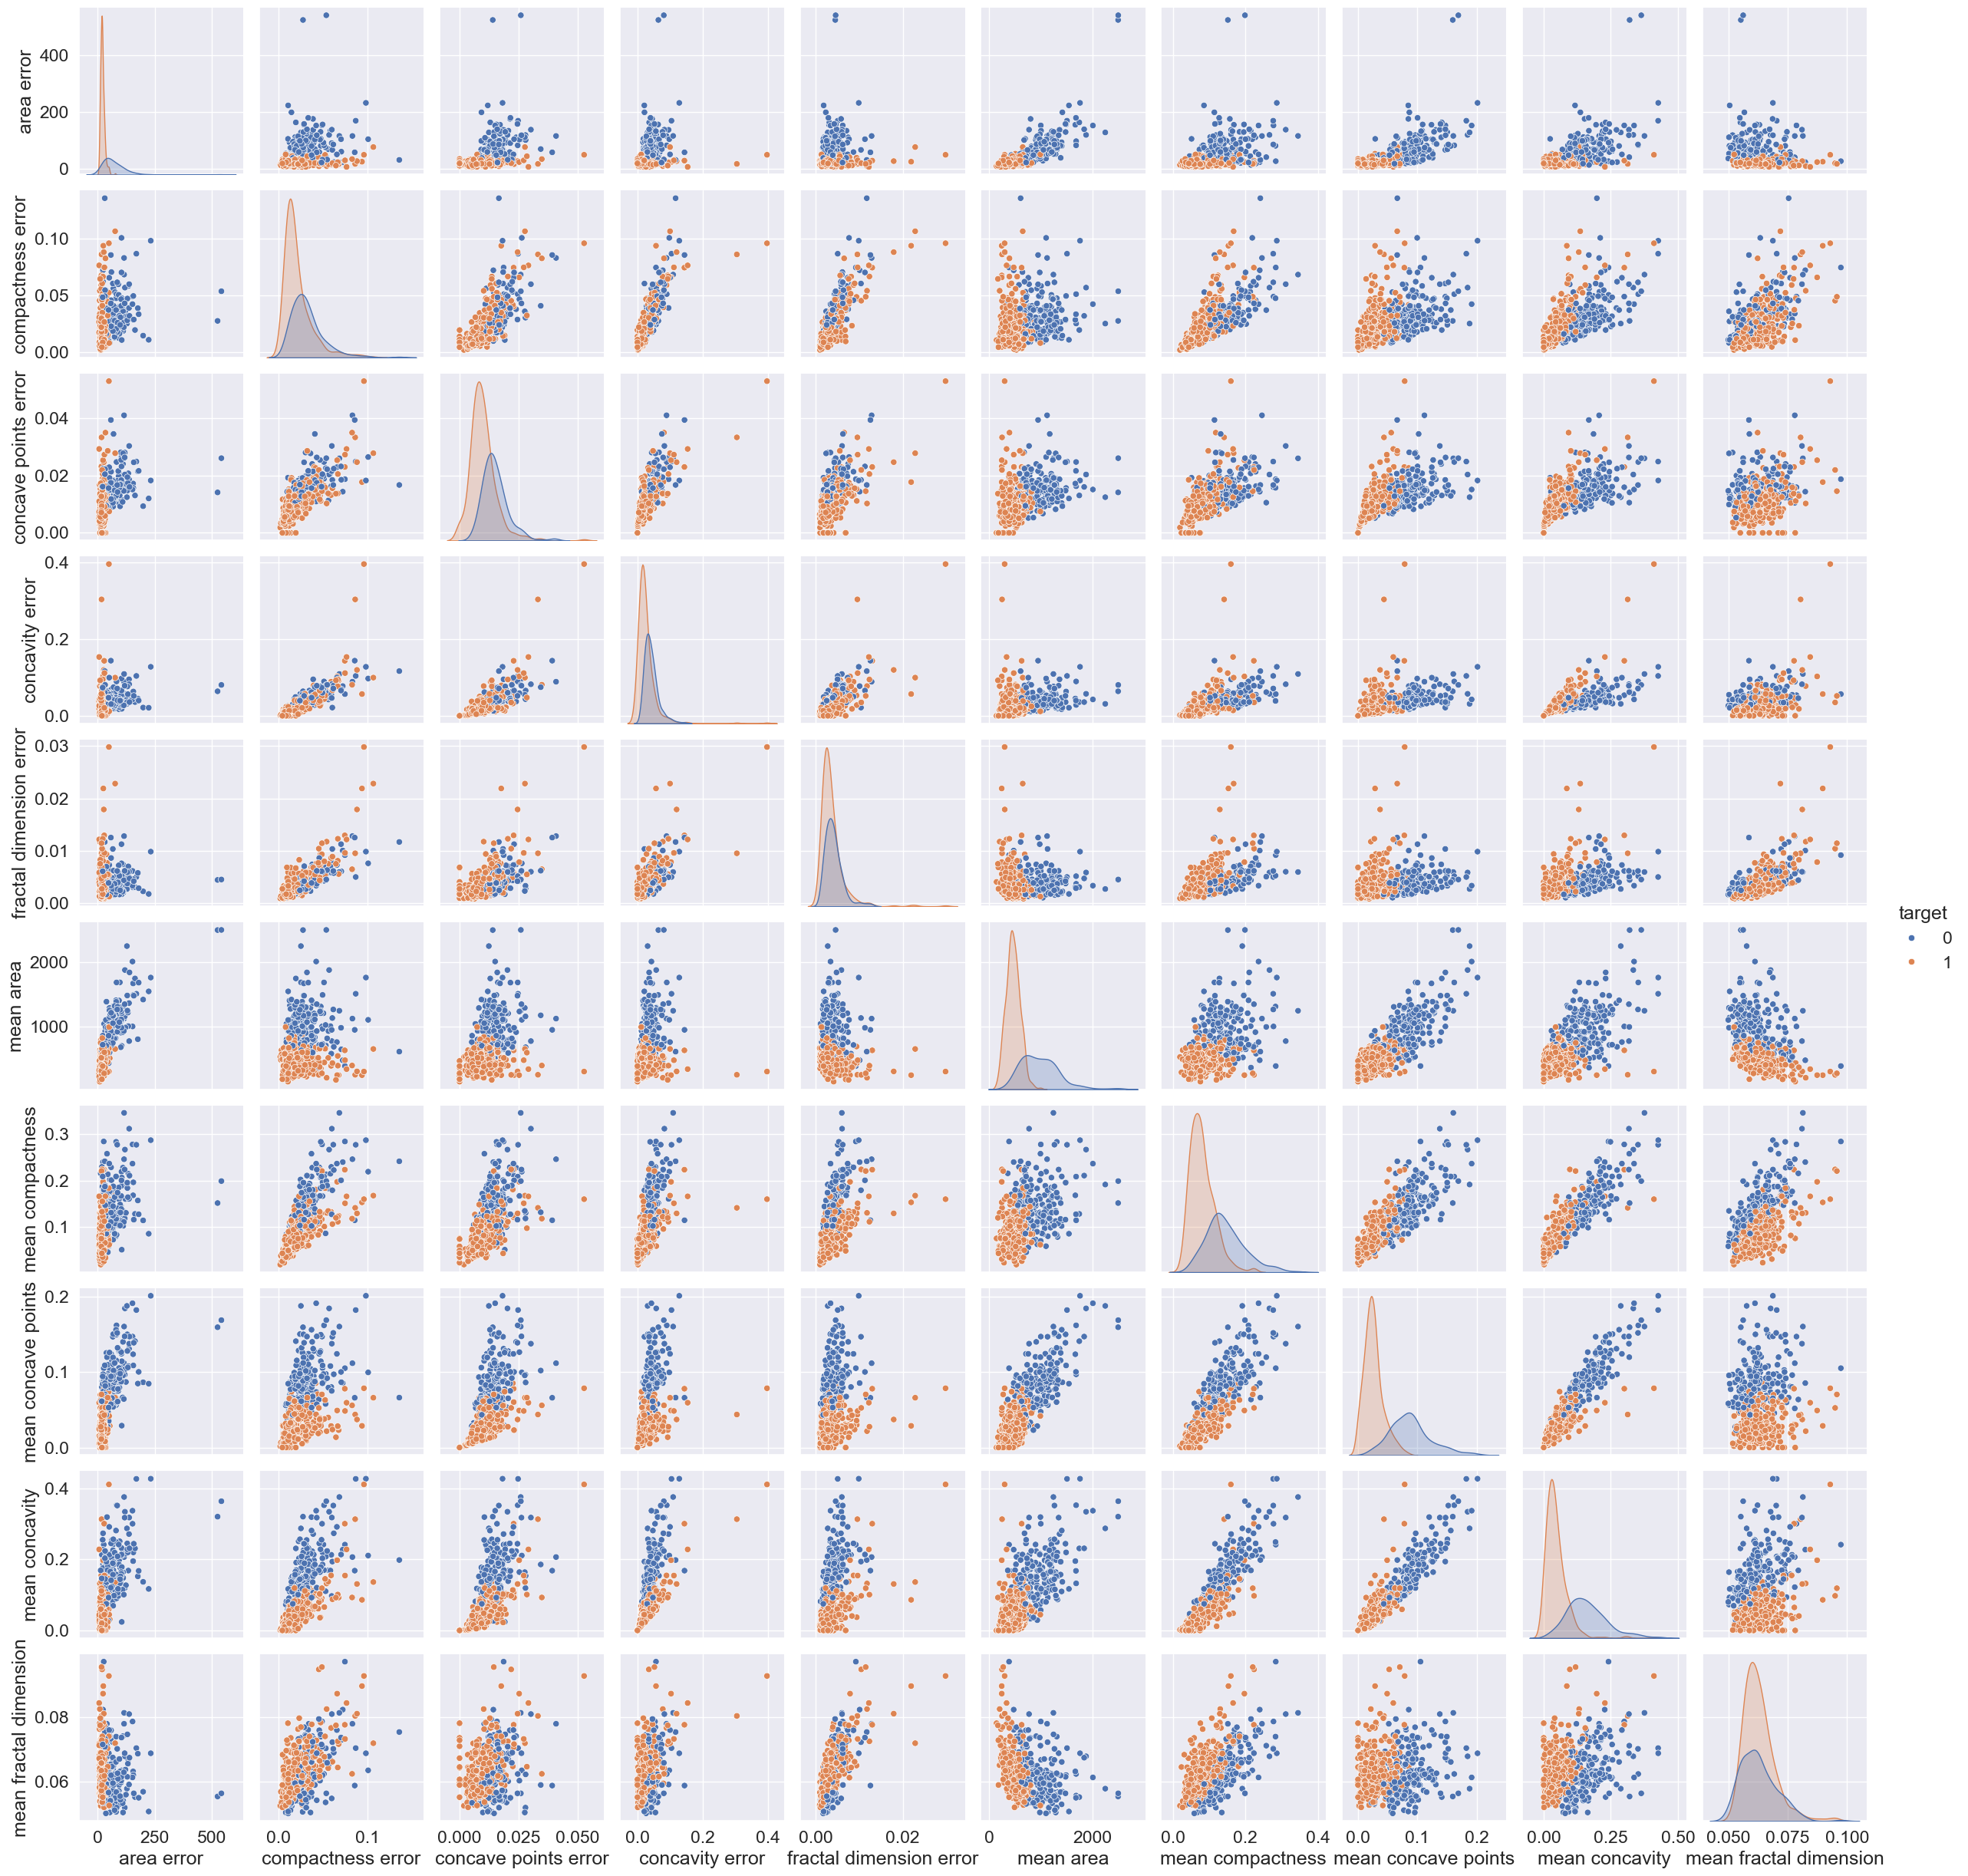

In [3]:
sorted_df =df.sort_index(axis = 1)

# Select the first 10 features for our feature list
features =sorted_df.columns[:10]

sorted_df['target'] = data.target 

#Make text bigger
sb.set(font_scale=1.5)

# Scatter-plot the relationship between features based on malignant/benign
plt.figure(figsize=(25,25))  
total_grid_scatter =sb.pairplot(sorted_df,hue='target', vars=features)
plt.show()

### D3 [1 mark]

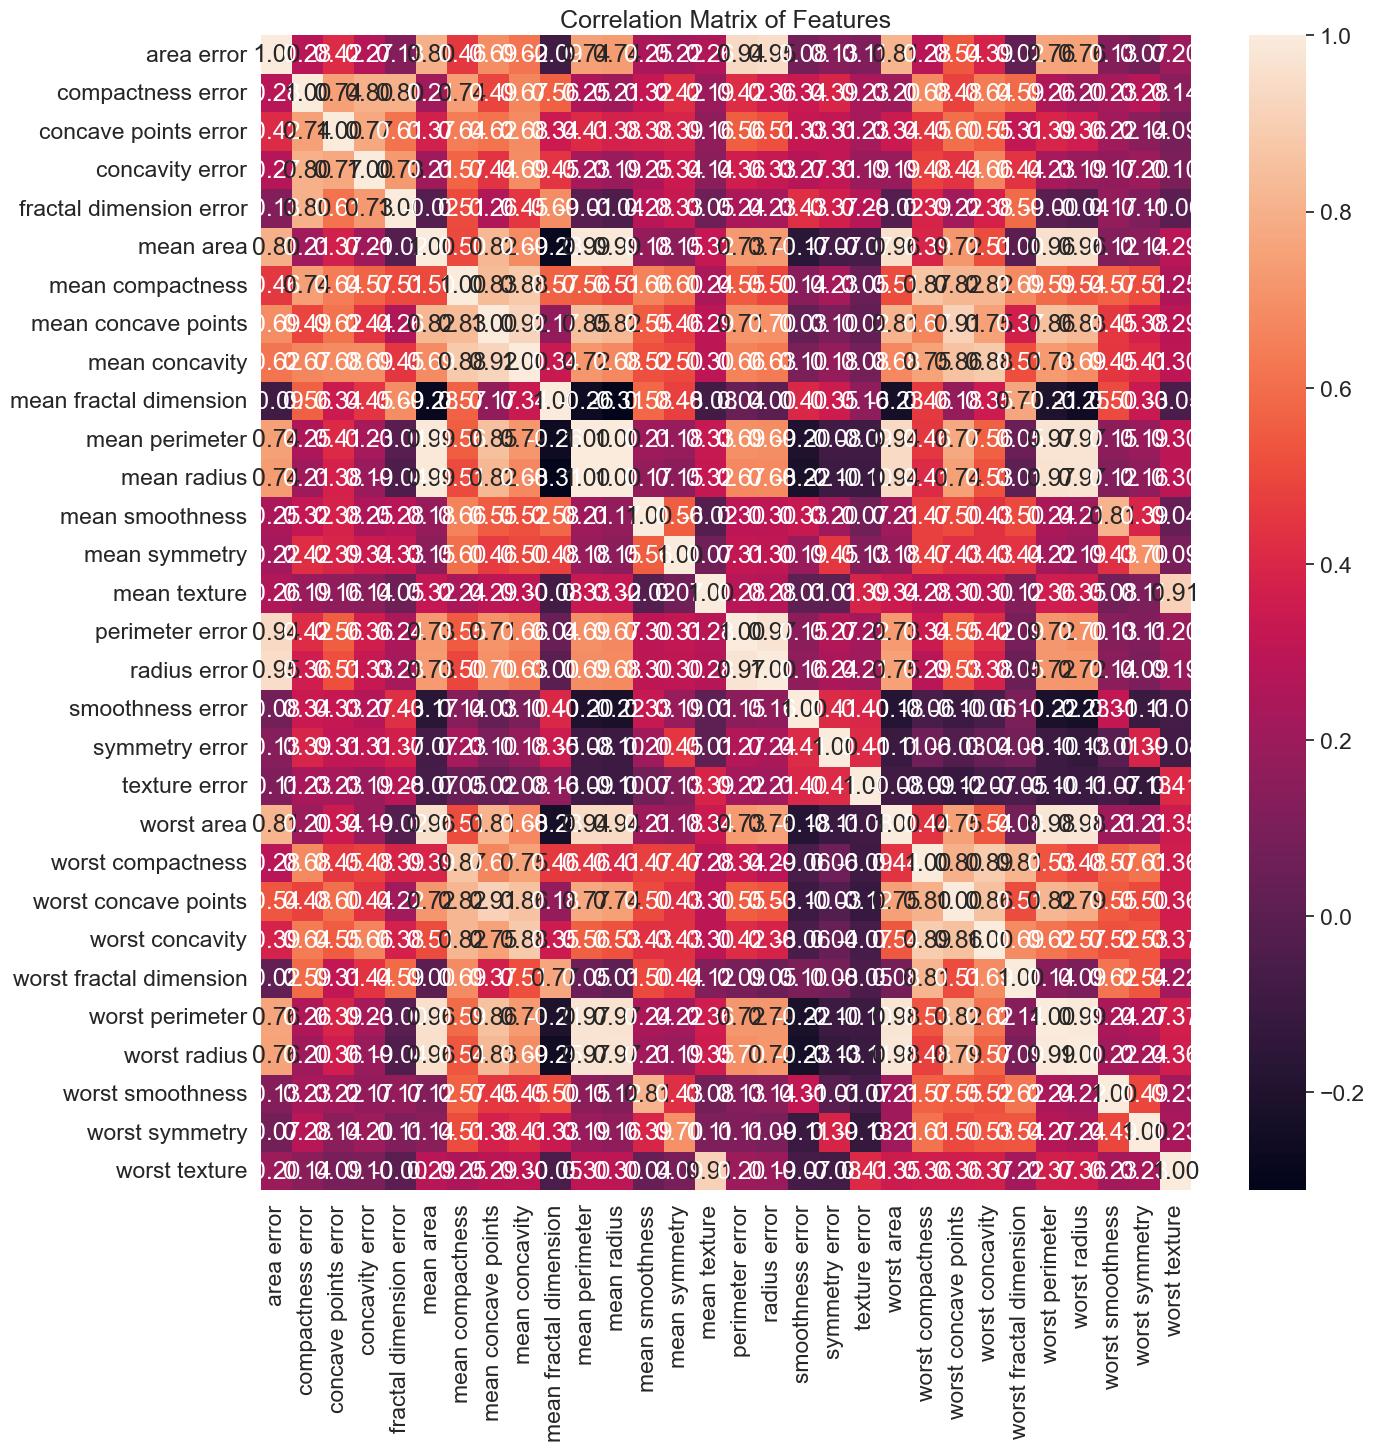

In [4]:
# Drop 'target' column and find correlation matrix with .corr
matrix = sorted_df.drop('target', axis=1).corr()

plt.figure(figsize=(15,15))

# heatmap with annotations, 2 decimal palces
sb.heatmap(matrix, annot=True, fmt=".2f")

plt.title('Correlation Matrix of Features')
plt.show()

### D5 [0 mark]

In [5]:
# List of features to drop from task
feature_list =['mean perimeter','mean radius','worst radius','worst perimeter','radius error']

# drop feature columns from list
df_new =sorted_df.drop(feature_list, axis=1)

# drop the name column
matrix =df_new.drop('target', axis=1)

# Check Shape and columns of matrix to ensure drop successful
print(matrix.shape)
print(matrix.columns.tolist())


(569, 25)
['area error', 'compactness error', 'concave points error', 'concavity error', 'fractal dimension error', 'mean area', 'mean compactness', 'mean concave points', 'mean concavity', 'mean fractal dimension', 'mean smoothness', 'mean symmetry', 'mean texture', 'perimeter error', 'smoothness error', 'symmetry error', 'texture error', 'worst area', 'worst compactness', 'worst concave points', 'worst concavity', 'worst fractal dimension', 'worst smoothness', 'worst symmetry', 'worst texture']


### D6 [3 marks]

In [6]:
# from sorted df, we want the features
x =df_new.drop('target', axis=1)

# from sorted df, this holds the class of df
y = df_new['target']

# Split with random_state set and 80/20 split 
training, testing, labels, answers= train_test_split(x, y,test_size=0.2, random_state=5508)

# Create Classifier (classifier also set to a random state of 5508)
classifier =DecisionTreeClassifier(random_state=5508)
classifier.fit(training, labels)

# Predictions on test and training set
predictions = classifier.predict(training)
testing_predictions = classifier.predict(testing)

# For training set (accuracy/precision/recall) based on predictions
# use methods from sklearn metrics
print("Training set")
print("accuracy/precision/recall")
print(accuracy_score(labels, predictions), precision_score(labels, predictions), recall_score(labels, predictions))

# For testing set (accuracy/precision/recall)
print ("\nTesting set")
print("accuracy/precision/recall")
print(accuracy_score(answers, testing_predictions), precision_score(answers, testing_predictions), recall_score(answers, testing_predictions))

# Confusion matrix
print ("\nConfusion Matrix")
print (confusion_matrix(answers, testing_predictions))

Training set
accuracy/precision/recall
1.0 1.0 1.0

Testing set
accuracy/precision/recall
0.9649122807017544 0.9726027397260274 0.9726027397260274

Confusion Matrix
[[39  2]
 [ 2 71]]


### D8 [2 marks]

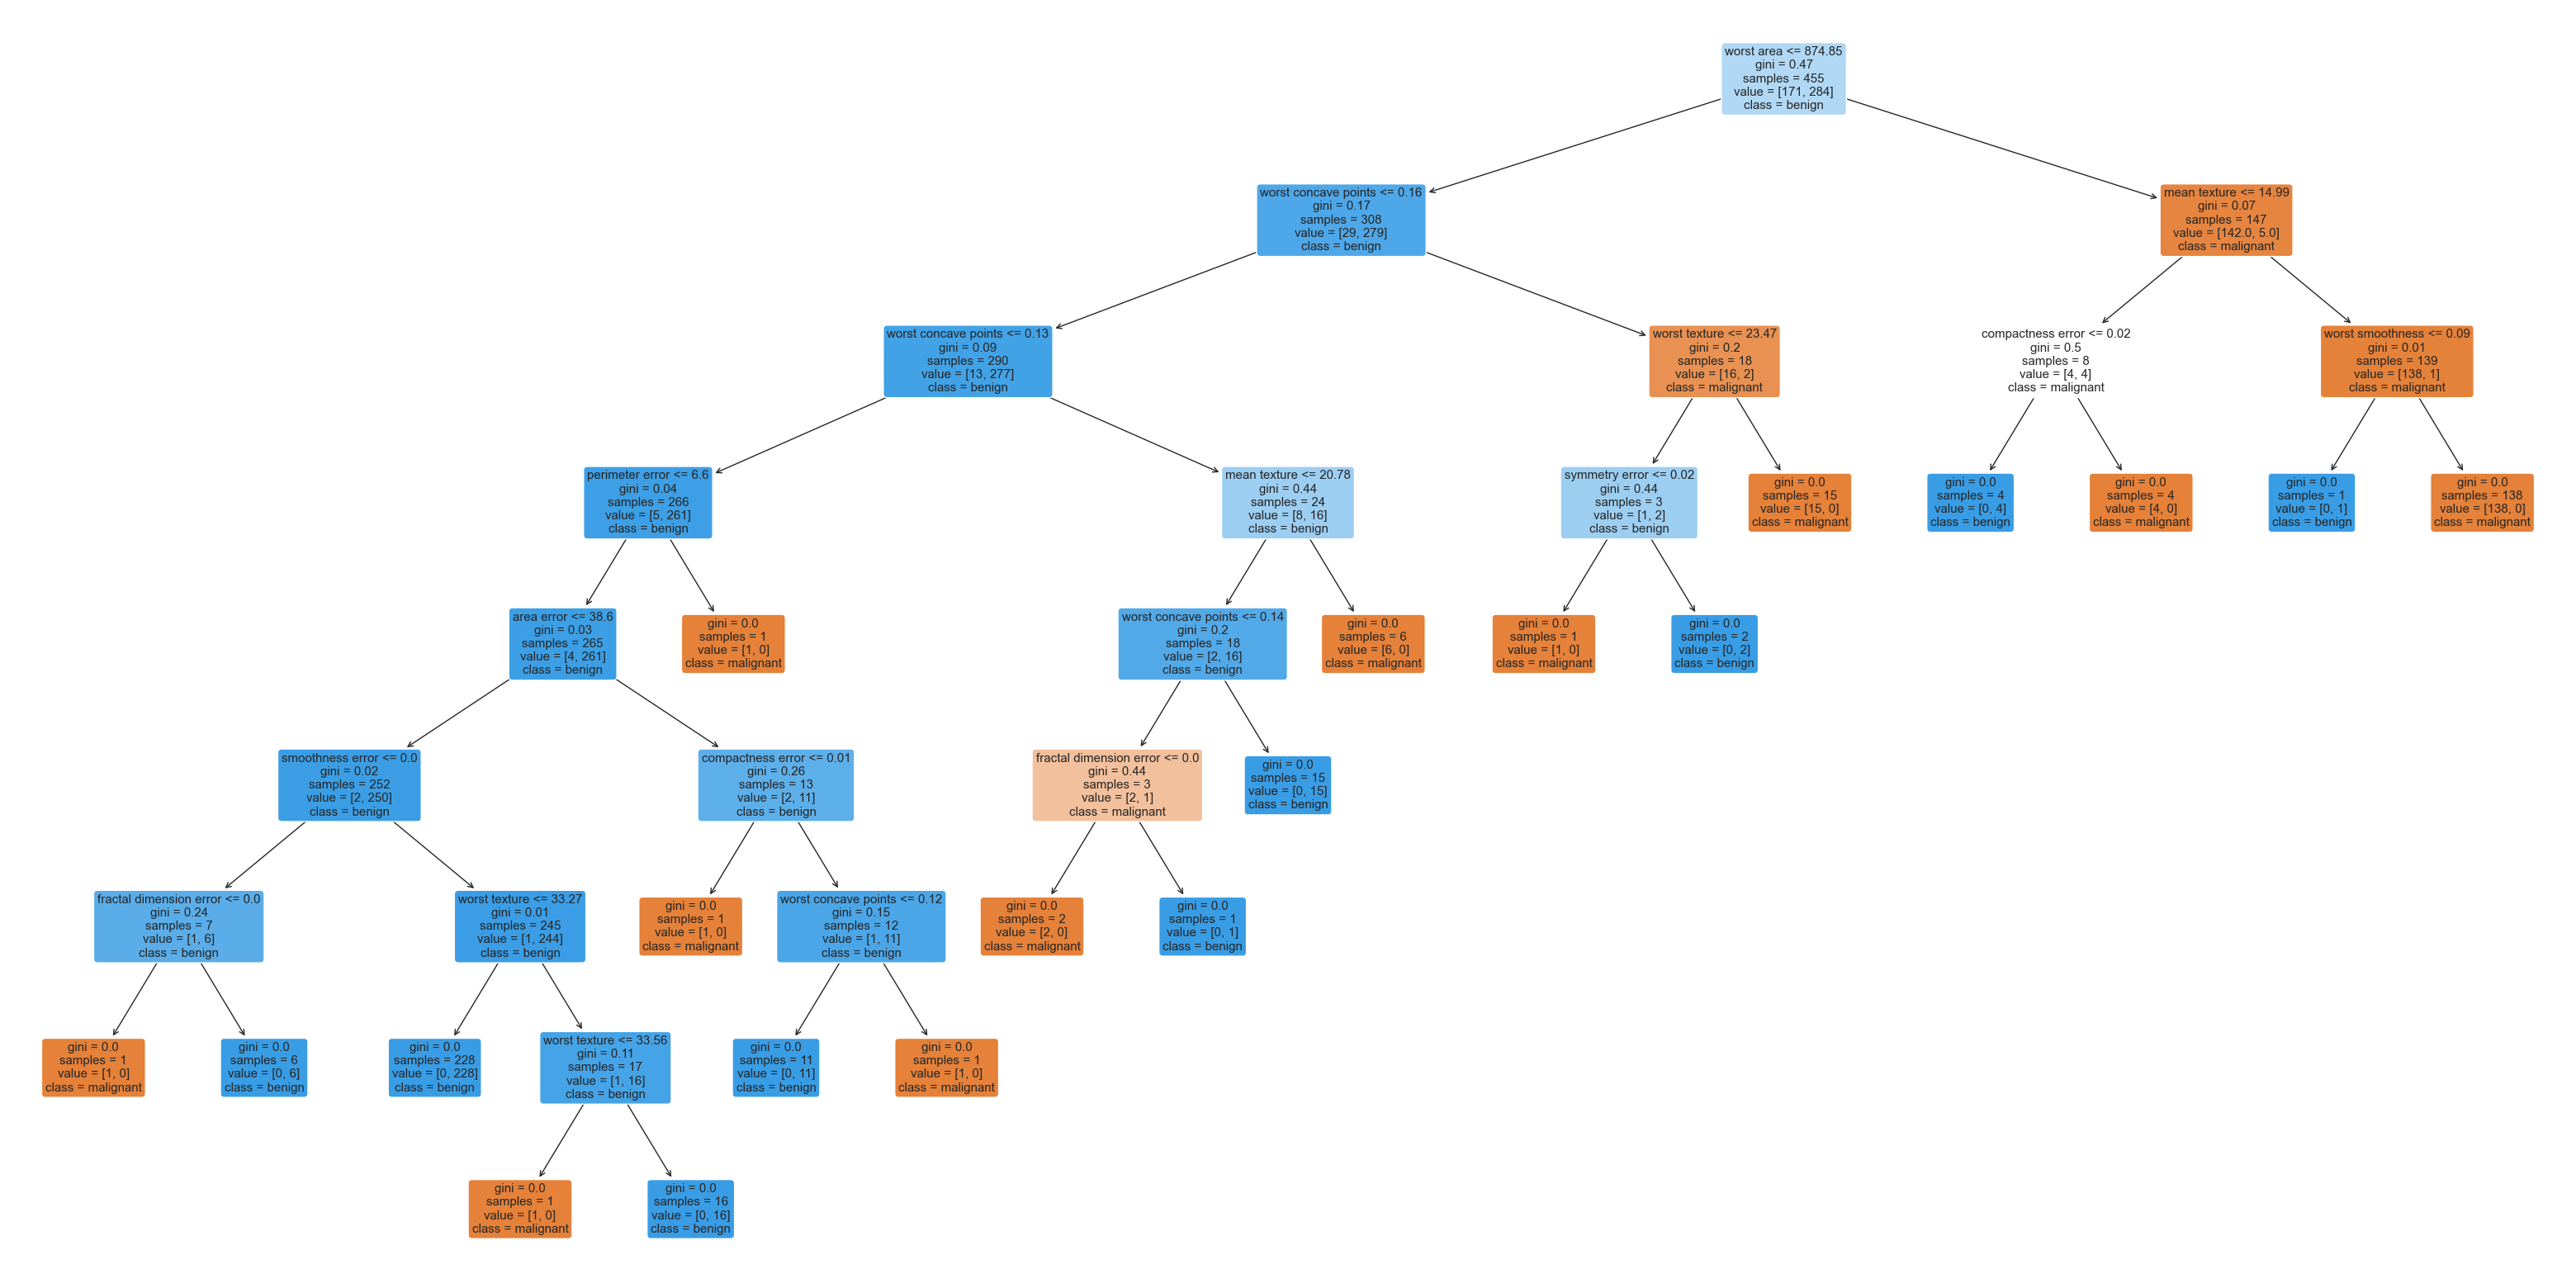

In [7]:
# Increase figure size such that labels are visible 
plt.figure(figsize=(40,20))
# Plot deicision matrix as tree
plot_tree(classifier, filled=True, feature_names=x.columns,class_names=data.target_names, rounded=True, proportion=False, precision=2)
plt.show()

### D10 [3 marks]

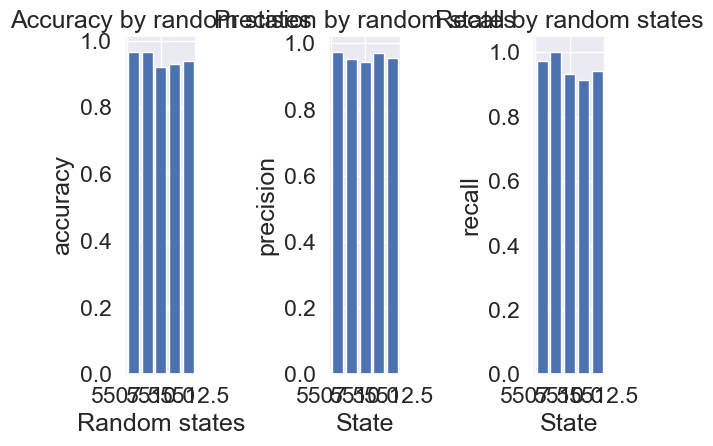

In [8]:
# scores (accuracy/precision/recall)
a = []
p = []
r = []

# list of states for the training/testing
states =[5508, 5509, 5510, 5511, 5512]

# For each state given, fit the data to a classifier
for i in range (len(states)):
    
    # Using given random states, split the data
    training, testing, labels, answers = train_test_split(x,y, test_size=0.2, random_state=states[i])
    
    # Create the classifier and fit with data 
    # Random state still set to 5508 as per the task
    classifier = DecisionTreeClassifier(random_state=5508)
    classifier.fit(training,labels)

    # TEST PERFORMANCE
    # Predictions for testing
    predictions= classifier.predict(testing)

    # Scores from testing (accuracy/precision/recall)
    a.append(accuracy_score (answers, predictions))
    p.append(precision_score (answers, predictions))
    r.append(recall_score (answers, predictions))

# Plot accuracy/precision/recall in subplots with labels
plt.subplot(1, 3, 1)
plt.bar(states, a)
plt.xlabel('Random states')
plt.ylabel('accuracy')
plt.title('Accuracy by random states')
plt.subplot(1, 3, 2)
plt.bar(states, p)
plt.xlabel('State')
plt.ylabel('precision')
plt.title('Precision by random states')
plt.subplot(1, 3, 3)
plt.bar(states, r)
plt.xlabel('State')
plt.ylabel('recall')
plt.title('Recall by random states')

# fit subplots to big plot
plt.tight_layout()
# show plot
plt.show()

### D11 [3 marks]

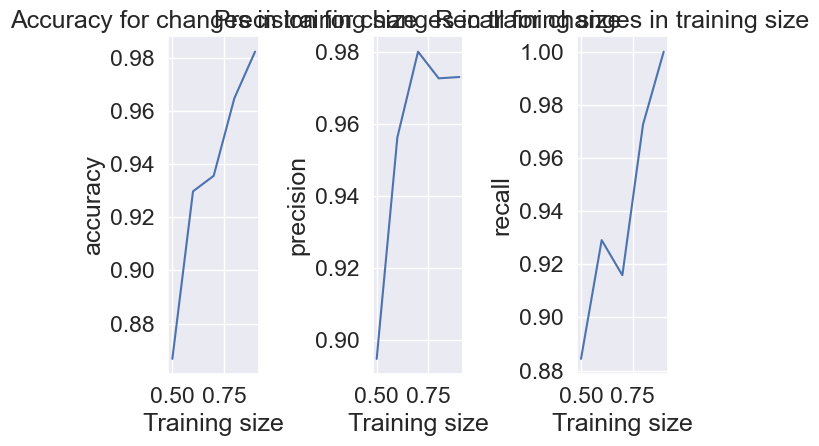

In [9]:
# list of split ratios for the training/testing
sizes = [0.5, 0.6, 0.7, 0.8, 0.9]

# scores (accuracy/precision/recall)
a = []
p = []
r = []

# For each size ratio, fit the data to a classifier
for i in range(len(sizes)):

    # Using given training sizes, split the data
    training, testing, labels, answers = train_test_split(x, y, train_size=sizes[i], random_state=5508)

    # Create the classifier and fit with data 
    # Random state still set to 5508 as per the task
    classifier= DecisionTreeClassifier (random_state=5508)
    classifier.fit (training, labels)

    # TEST PERFORMANCE
    # Predictions for testing
    predictions= classifier.predict(testing)

    # Scores from testing (accuracy/precision/recall)
    a.append(accuracy_score (answers, predictions))
    p.append(precision_score (answers, predictions))
    r.append(recall_score (answers, predictions))

# Plot accuracy/precision/recall in subplots with labels
plt.subplot(1, 3, 1)
plt.plot(sizes, a)
plt.title('Accuracy for changes in training size')
plt.xlabel('Training size')
plt.ylabel('accuracy')
plt.subplot(1, 3, 2)
plt.plot(sizes, p)
plt.title('Precision for changes in training size')
plt.xlabel('Training size')
plt.ylabel('precision')
plt.subplot(1, 3, 3)
plt.plot(sizes, r)
plt.title('Recall for changes in training size')
plt.xlabel('Training size')
plt.ylabel('recall')

# fit subplots to big plot
plt.tight_layout()
# show plot
plt.show()

### D12 [4 marks]

In [10]:
# Parameters set out in the task D11
parameters = {
    'max_depth': [2, 3, 4, 5],
    'min_samples_split': [2, 4, 5, 10],
    'min_samples_leaf': [2, 5],
}

# Create the classifier and fit with data 
classifier = DecisionTreeClassifier(random_state=5508)

# Cross validator with random state 42 
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Apply 10-fold cross validation to classifier 
grid_search = GridSearchCV(estimator=classifier, param_grid=parameters, cv=cv, scoring='accuracy')

# Using given data, split into training, testing etc. 
training, testing, labels, answers = train_test_split(x, y, test_size=0.2, random_state=5508)

grid_search.fit(training, labels)

# return the best parameters and best classifier
best_parameters = grid_search.best_params_
best_classifier = grid_search.best_estimator_

# Best hyperparameters
print("best parameters", best_parameters)

# perform trining set on data
predictions = best_classifier.predict(training)
print("Training set")
print("accuracy/precision/recall")
print(accuracy_score(labels, predictions), precision_score(labels, predictions), recall_score(labels, predictions))

# test testing set on data
testing_predictions = best_classifier.predict(testing)
print("Testing set")
print("accuracy/precision/recall")
print(accuracy_score(answers, testing_predictions), precision_score(answers, testing_predictions), recall_score(answers, testing_predictions))

# Confusion matrix print
print("Confusion matrix")
print(confusion_matrix(answers, testing_predictions))

best parameters {'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2}
Training set
accuracy/precision/recall
0.9648351648351648 0.9527027027027027 0.9929577464788732
Testing set
accuracy/precision/recall
0.9385964912280702 0.9583333333333334 0.9452054794520548
Confusion matrix
[[38  3]
 [ 4 69]]


### D14 [3 marks]

In [11]:
# For each scoring option, we want to find the optimal hyperparameters for each
# We will be performing 10 fold cross validation and grid search
for scoring in ['accuracy', 'precision', 'recall']:
    # Set up  grid search with random state with the scoring set according to 'scoring' from list 
    # We set up a grid search for each option
    grid= GridSearchCV(estimator=DecisionTreeClassifier(random_state=5508), param_grid=parameters, cv=cv, scoring=scoring)
    grid.fit(training, labels)
    
    # find the best parameter and best classifier
    # this applies for all scoring
    best_parameters = grid.best_params_
    classifier = grid.best_estimator_

    # best parameters and confusion matrix for each mode
    # test testing set on data and print results
    predictions = classifier.predict(testing)
    print(scoring)
    print(best_parameters)
    print(confusion_matrix(answers, predictions))

accuracy
{'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2}
[[38  3]
 [ 4 69]]
precision
{'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}
[[39  2]
 [ 5 68]]
recall
{'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2}
[[38  3]
 [ 4 69]]


### D15 [1 mark]

In [12]:
# Best parameters from task D12
print(best_parameters)

# train classifier using these 'optimal' parameters
classifier = DecisionTreeClassifier(max_depth=3, min_samples_leaf=2, min_samples_split=2, random_state=5508)
classifier.fit(training, labels)

# find importance of each feature
importance = classifier.feature_importances_

# Turn to data frame to sort
importances_df = pd.DataFrame({'Feature': training.columns,'Importance': importance})

# Sort the dataframe for features by importance in desceding order 
importances_df.sort_values(by='Importance', ascending=False, inplace=True)

print(importances_df)

{'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2}
                    Feature  Importance
17               worst area    0.801542
19     worst concave points    0.151040
10          mean smoothness    0.019469
12             mean texture    0.012717
24            worst texture    0.011775
13          perimeter error    0.003456
5                 mean area    0.000000
16            texture error    0.000000
23           worst symmetry    0.000000
22         worst smoothness    0.000000
21  worst fractal dimension    0.000000
20          worst concavity    0.000000
2      concave points error    0.000000
18        worst compactness    0.000000
3           concavity error    0.000000
15           symmetry error    0.000000
6          mean compactness    0.000000
14         smoothness error    0.000000
1         compactness error    0.000000
11            mean symmetry    0.000000
4   fractal dimension error    0.000000
9    mean fractal dimension    0.000000
8            mea

### D16 [3 marks]

In [13]:
# Use selector from SelectFromModel
selector = SelectFromModel(classifier, threshold=0.01)
selector.fit(training, labels) 

# Retained features
print("Retained")
print(training.columns[selector.get_support()].tolist())

# Not retained features (did not meet threshold)
print("\nNot Retained")
print(training.columns[~selector.get_support()].tolist())

# Total feature importance sum after features removed
print("\nTotal feature Importance value")
print(sum(classifier.feature_importances_[selector.get_support()]).tolist())

Retained
['mean smoothness', 'mean texture', 'worst area', 'worst concave points', 'worst texture']

Not Retained
['area error', 'compactness error', 'concave points error', 'concavity error', 'fractal dimension error', 'mean area', 'mean compactness', 'mean concave points', 'mean concavity', 'mean fractal dimension', 'mean symmetry', 'perimeter error', 'smoothness error', 'symmetry error', 'texture error', 'worst compactness', 'worst concavity', 'worst fractal dimension', 'worst smoothness', 'worst symmetry']

Total feature Importance value
0.9965437229287063


### D17 [3 marks]

In [14]:
# Define selected features from previous D16
features = training.columns[selector.get_support()].tolist()

# Reduce the training/testing set based on the features (only taking selected features)
reduced_train = training[features]
reduced_test = testing[features]

# Check features actually reduced
# print (reduced_train)
# print(training)

# Train model on the full set of features
# Should already be defined but redefine for clarity
classifier = DecisionTreeClassifier(random_state=5508, max_depth=3, min_samples_leaf=2, min_samples_split=2)
classifier.fit(training, labels)

# Train model on the reduced set of features from (reduced_train)
reduced_classifier = DecisionTreeClassifier(random_state=5508, max_depth=3, min_samples_leaf=2, min_samples_split=2)
reduced_classifier.fit(reduced_train, labels)

# generating predictions from training
predictions = classifier.predict(training)
# generating predictions from reduced set training
reduced_predictions = reduced_classifier.predict(reduced_train)

# Test set evaluation
# generating predictions from test set
test_predictions = classifier.predict(testing)
# generating predictions from reduced test set
r_test_predictions = reduced_classifier.predict(reduced_test)

# Complete set results
# print results

print("\nNothing removed training results")
print("accuracy/precision/recall")
print(accuracy_score(labels, predictions), precision_score(labels, predictions), recall_score(labels, predictions))


print("\nNothing removed test results")
print("accuracy/precision/recall")
print(accuracy_score(answers, test_predictions), precision_score(answers, test_predictions), recall_score(answers, test_predictions))
print("Confusion Matrix")
print(confusion_matrix(answers, test_predictions))

# Removed features results

print("\nRemoved features training results")
print("accuracy/precision/recall")
print(accuracy_score(labels, reduced_predictions), precision_score(labels, reduced_predictions), recall_score(labels, reduced_predictions))

print("\nRemoved features testing results")
print("accuracy/precision/recall")
print(accuracy_score(answers, r_test_predictions), precision_score(answers, r_test_predictions), recall_score(answers, r_test_predictions))
print("Confusion Matrix")
print(confusion_matrix(answers, r_test_predictions))


Nothing removed training results
accuracy/precision/recall
0.9648351648351648 0.9527027027027027 0.9929577464788732

Nothing removed test results
accuracy/precision/recall
0.9385964912280702 0.9583333333333334 0.9452054794520548
Confusion Matrix
[[38  3]
 [ 4 69]]

Removed features training results
accuracy/precision/recall
0.9648351648351648 0.9527027027027027 0.9929577464788732

Removed features testing results
accuracy/precision/recall
0.9385964912280702 0.9583333333333334 0.9452054794520548
Confusion Matrix
[[38  3]
 [ 4 69]]


### D19 [3 marks]

In [15]:
# Given parameters from task description
param_grid = {
    'n_estimators': [10, 20, 50, 100, 1000],
    'max_depth': [2, 3, 4, 5]
}

# Perform grid search with hyperparameters as stated in the question
# CV is 10 fold cv as defined earlier in D12
grid = GridSearchCV(estimator=RandomForestClassifier(random_state=5508), param_grid=param_grid, cv=cv, scoring='accuracy')
grid.fit(training, labels)

# find the best parameters and best classifier from the grid search
parameters = grid.best_params_
classifier = grid.best_estimator_

# From best parameters we can find the optimal hyperparameters from dict
print("Optimal estimators", parameters['n_estimators'])
print("Optimal depth", parameters['max_depth'])

# For training set (accuracy/precision/recall)
print ("\n Training accuracy, precision, recall")
# predictions based on training set
predictions = classifier.predict(training)
# Using metrics from sklearn, judge accuracy/precision/recall
print(accuracy_score(labels, predictions), precision_score(labels, predictions), recall_score(labels, predictions))

#For testing set(accuracy/precision/recall)
print ("\n Testing accuracy, precision, recall")
predictions = classifier.predict(testing)
print(accuracy_score(answers, predictions), precision_score(answers, predictions), recall_score(answers, predictions))

# Confusion matrix from test set
print("Confusion matrix\n", confusion_matrix(answers, predictions))

Optimal estimators 50
Optimal depth 5

 Training accuracy, precision, recall
0.9912087912087912 0.9861111111111112 1.0

 Testing accuracy, precision, recall
0.9824561403508771 0.9863013698630136 0.9863013698630136
Confusion matrix
 [[40  1]
 [ 1 72]]
